In [8]:
# Let's import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Class definition for NeuralNetwork
class NeuralNetwork():
    
    def __init__(self):
        # Set the seed for random number generation for reproducibility
        np.random.seed(1)
        
        # Initialize synaptic weights to random values between -1 and 1
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
    
    def sigmoid(self, x):
        """ Sigmoid activation function. """
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """ Derivative of sigmoid function. """
        return x * (1 - x)
    
    def train(self, training_inputs, training_outputs, training_iterations):
        """ Train the neural network with backpropagation. """
        # List to keep track of the error over iterations for visualization
        error_list = []
        weight_list = []
        grad_list = []
        
        for itr in range(training_iterations):
            # Perform a forward pass
            output = self.think(training_inputs)
            
            # Compute the error
            error = training_outputs - output
            
            # Backpropagation (adjust the synaptic weights)
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
            
            # Record the error, synaptic weights, and gradients for plotting
            error_list.append(np.mean(np.abs(error)))
            weight_list.append(self.synaptic_weights.copy())
            grad_list.append(adjustments.copy())
        
        return error_list, weight_list, grad_list
    
    def think(self, inputs):
        """ Calculate output based on input data and current weights. """
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


In [10]:
# Create a neural network instance
neural_network = NeuralNetwork()

# Visualize the initial synaptic weights
print("Random synaptic weights (before training): ")
print(neural_network.synaptic_weights)


Random synaptic weights (before training): 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [11]:
# Define the training data (inputs and outputs)
training_inputs = np.array([[0, 0, 1],
                            [1, 1, 1],
                            [1, 0, 1],
                            [0, 1, 1]])

training_outputs = np.array([[0, 1, 1, 0]]).T

# Train the neural network with 10,000 iterations
error_list, weight_list, grad_list = neural_network.train(training_inputs, training_outputs, 10000)


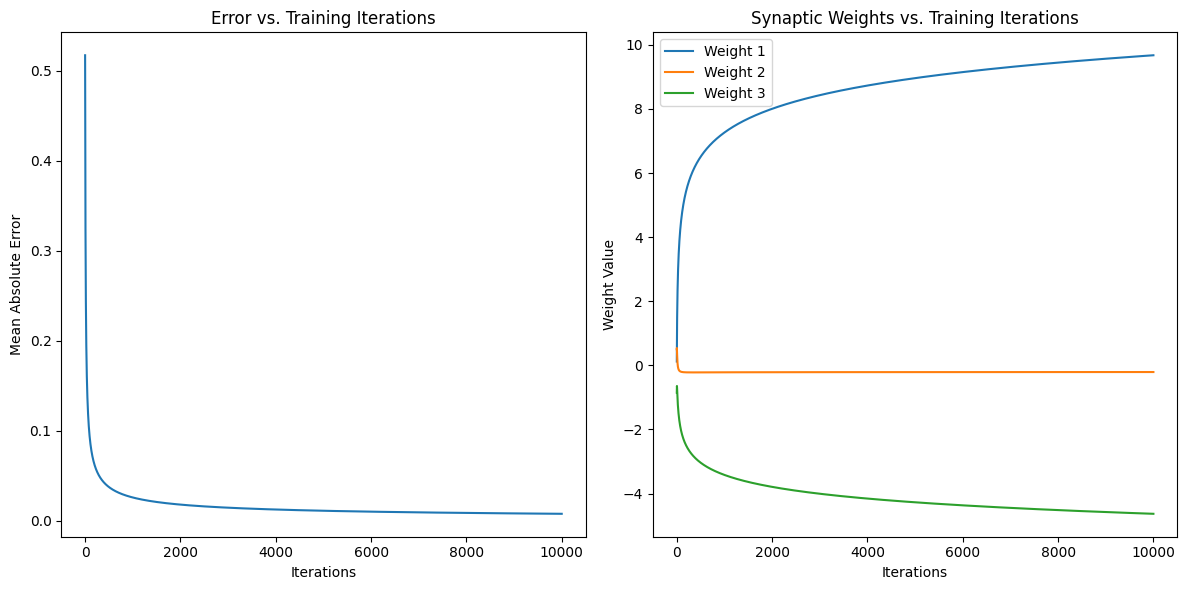

In [12]:
# Visualize the error over time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(error_list)
plt.title('Error vs. Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')

# Visualize the synaptic weights changes during training
weight_list = np.array(weight_list)
plt.subplot(1, 2, 2)
plt.plot(weight_list[:, 0], label="Weight 1")
plt.plot(weight_list[:, 1], label="Weight 2")
plt.plot(weight_list[:, 2], label="Weight 3")
plt.title('Synaptic Weights vs. Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.legend()

plt.tight_layout()
plt.show()

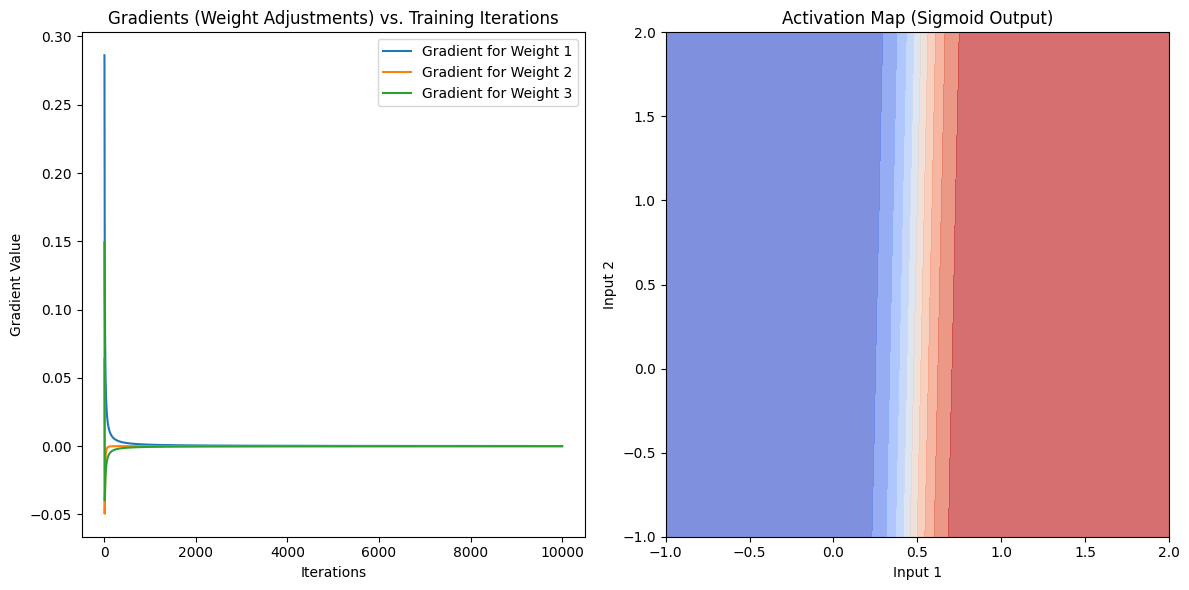

In [13]:
# Plot the gradient (adjustment) for each weight
grad_list = np.array(grad_list)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(grad_list[:, 0], label="Gradient for Weight 1")
plt.plot(grad_list[:, 1], label="Gradient for Weight 2")
plt.plot(grad_list[:, 2], label="Gradient for Weight 3")
plt.title('Gradients (Weight Adjustments) vs. Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Gradient Value')
plt.legend()

# Activation map visualization for a range of inputs
x_vals = np.linspace(-1, 2, 100)
y_vals = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# We will treat the input to the neural network as [x, y, 1] to include bias
input_grid = np.c_[X.ravel(), Y.ravel(), np.ones_like(X.ravel())]
Z = neural_network.sigmoid(np.dot(input_grid, neural_network.synaptic_weights))
Z = Z.reshape(X.shape)

plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.7)
plt.title("Activation Map (Sigmoid Output)")
plt.xlabel('Input 1')
plt.ylabel('Input 2')

plt.tight_layout()
plt.show()

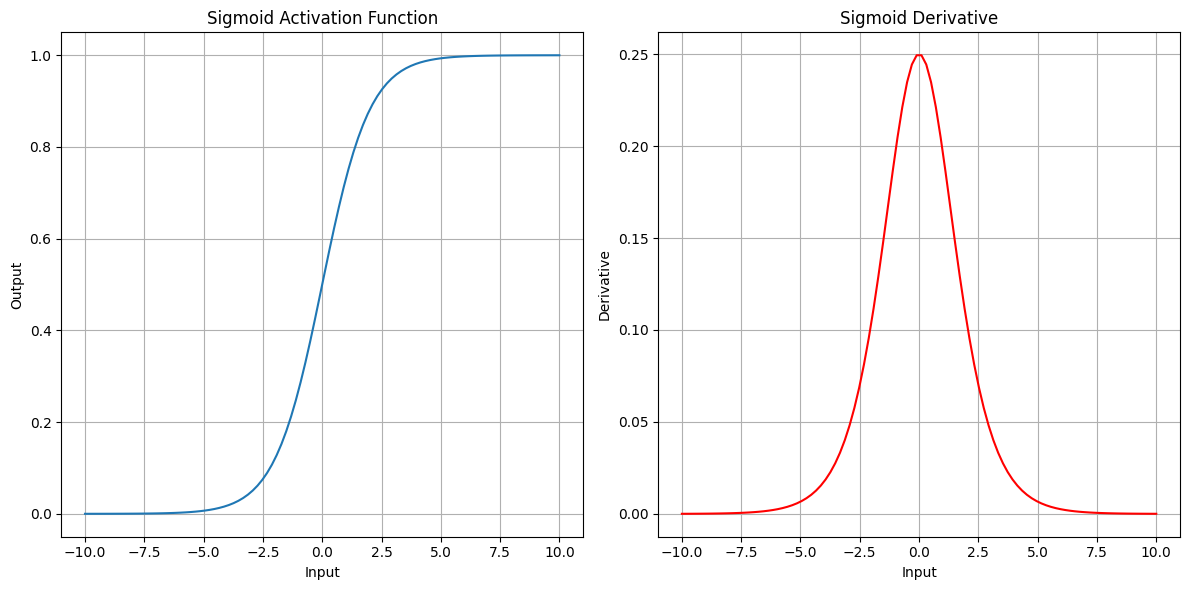

In [14]:
# Visualize the sigmoid function and its derivative
x_vals = np.linspace(-10, 10, 100)
y_vals_sigmoid = neural_network.sigmoid(x_vals)
y_vals_sigmoid_derivative = neural_network.sigmoid_derivative(y_vals_sigmoid)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals_sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals_sigmoid_derivative, label='Sigmoid Derivative', color='r')
plt.title('Sigmoid Derivative')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:

# Test the trained model with a new input
A, B, C = 0, 1, 1
print(f"New situation: input data = {A}, {B}, {C}")
print("Output data: ")
print(neural_network.think(np.array([A, B, C])))


New situation: input data = 0, 1, 1
Output data: 
[0.00786466]


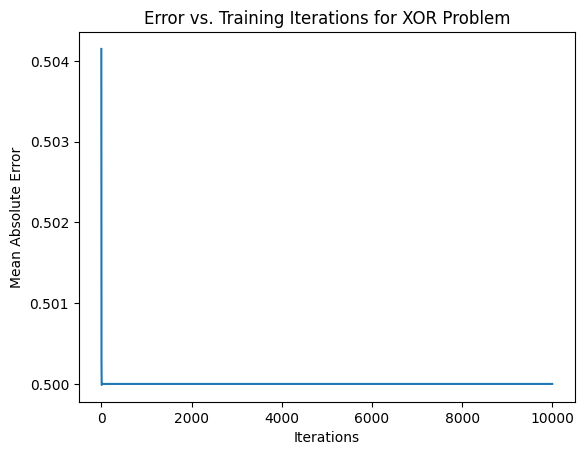

In [16]:

# Decision boundary visualization (for 2D inputs)
# We will simulate a 2D version of this neural network for the XOR problem
# Training data for XOR problem
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# Initialize a new neural network for XOR problem (without the bias input, hence 2 features)
xor_network = NeuralNetwork()
xor_network.synaptic_weights = 2 * np.random.random((2, 1)) - 1

# Train the XOR network
error_list_xor, _, _ = xor_network.train(X_train, y_train, 10000)

# Visualize the error for XOR problem
plt.plot(error_list_xor)
plt.title('Error vs. Training Iterations for XOR Problem')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.show()

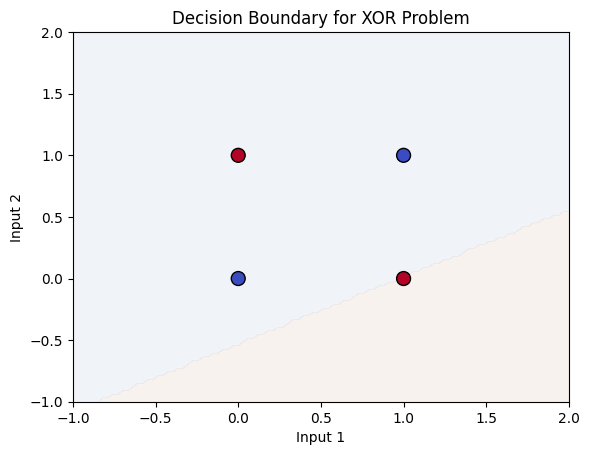

In [17]:
# Visualizing the decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
Z = xor_network.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], xor_network.synaptic_weights))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap="coolwarm", edgecolors="k", s=100)
plt.title("Decision Boundary for XOR Problem")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()
